## predictive analytics klasifikasi pada faktor faktor hubungan yang mempengaruhi penyakit jantung

### menggunakan algoritma KNN

import library dan data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
#Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('heart.csv')

Sneak Peek Data

In [3]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
#Dependent variabel(y) adalah price
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(df.tail())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


### penjelasan kolom

In [5]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 12 kolom (features) dengan 918 baris
df.shape

(918, 12)

In [6]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#cek apakah ada missing value 
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
M    725
F    193
Name: count, dtype: int64


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [10]:
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
1    725
0    193
Name: count, dtype: int64


In [11]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['Sex']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['Sex'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('Sex', axis=1), one_hot_df], axis=1)

In [12]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['ChestPainType'].astype(str).value_counts(dropna=False)

print(value_counts)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [13]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ChestPainType']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ChestPainType'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ChestPainType', axis=1), one_hot_df], axis=1)

In [14]:
value_counts = df['RestingECG'].astype(str).value_counts(dropna=False)

print(value_counts)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [15]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['RestingECG']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RestingECG'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('RestingECG', axis=1), one_hot_df], axis=1)

In [16]:
value_counts = df['ExerciseAngina'].astype(str).value_counts(dropna=False)

print(value_counts)

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


In [17]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ExerciseAngina']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ExerciseAngina'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ExerciseAngina', axis=1), one_hot_df], axis=1)

In [18]:
value_counts = df['ST_Slope'].astype(str).value_counts(dropna=False)

print(value_counts)

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [19]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ST_Slope']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ST_Slope'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ST_Slope', axis=1), one_hot_df], axis=1)

In [20]:
value_counts = df['HeartDisease'].astype(str).value_counts(dropna=False)

print(value_counts)

HeartDisease
1    508
0    410
Name: count, dtype: int64


### visualisasi label

              jumlah sampel  persentase
HeartDisease                           
1                       508        55.3
0                       410        44.7


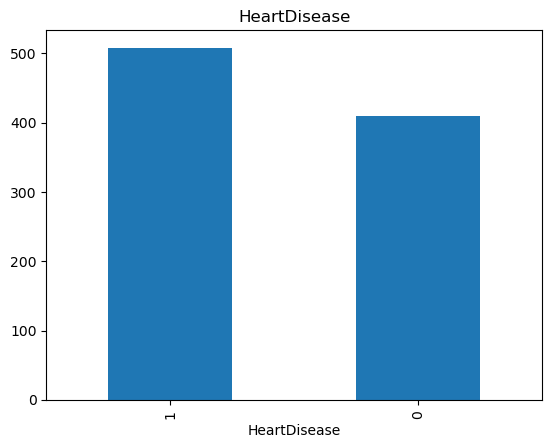

In [21]:
fitur = "HeartDisease"
count = df[fitur].value_counts()
percent = 100*df[fitur].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=fitur);

### EDA ( Deskripsi Data )

In [22]:
print(df.describe())
print(df.info())
print(df.shape)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease       Sex_0       Sex_1  ChestPainType_ASY  \
count  918.000000    918.000000  918.000000  918.000000         918.000000   
mean     0.887364      0.553377    0.210240    0.789760           0.540305   
std      1.066570      0.497414    0.407701    0.407701           0.498645   
min     -2.600000      0.000000    0.000000    0.000000  

### Cek kembali missing value, duplikasi, inkonsisten dan Outliers

In [23]:
# mencari missing value
print(df.isnull().sum())
print(df.isna().sum())

#mencari data terduplikasi
print("data duplikasi:", df.duplicated().sum())

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_0                0
Sex_1                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_0                0
Sex_1                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
data dup

In [24]:
#mencari nilai yang tidak konsisten (nilai negatif pada data)
continuous_features = ['Age',
                      'RestingBP',
                      'Cholesterol',
                      'FastingBS',
                      'MaxHR','Oldpeak',
                     ]
for feature in continuous_features:
    print(str(feature)+': '+str(sum(df[feature] < 0)))

Age: 0
RestingBP: 0
Cholesterol: 0
FastingBS: 0
MaxHR: 0
Oldpeak: 13


#### visualisasi outliers dengan boxplot

Axes(0.125,0.11;0.775x0.77)


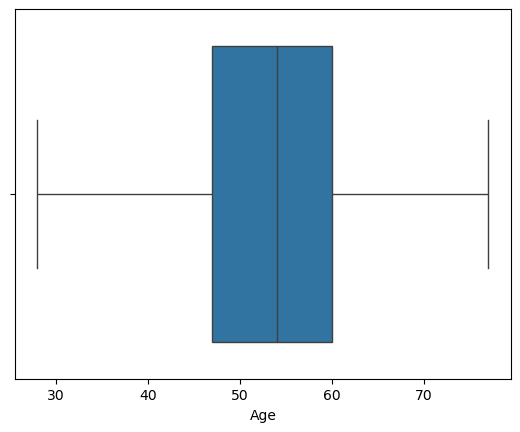

In [25]:
#boxlplot kolom age
print(sns.boxplot(x=df['Age']))

Axes(0.125,0.11;0.775x0.77)


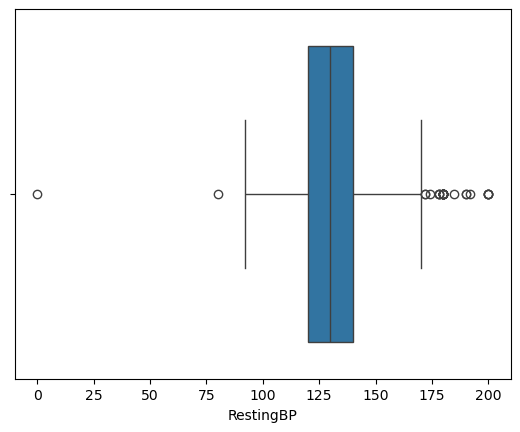

In [26]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['RestingBP']))

Axes(0.125,0.11;0.775x0.77)


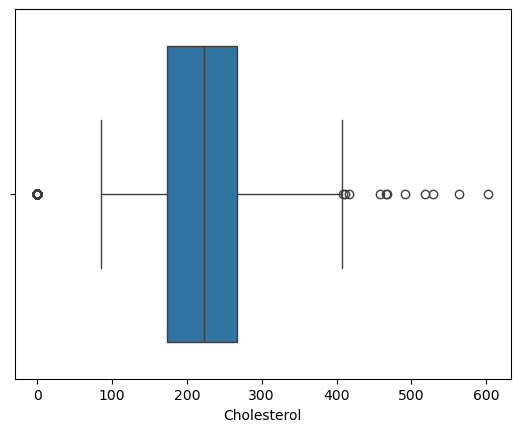

In [27]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['Cholesterol']))

Axes(0.125,0.11;0.775x0.77)


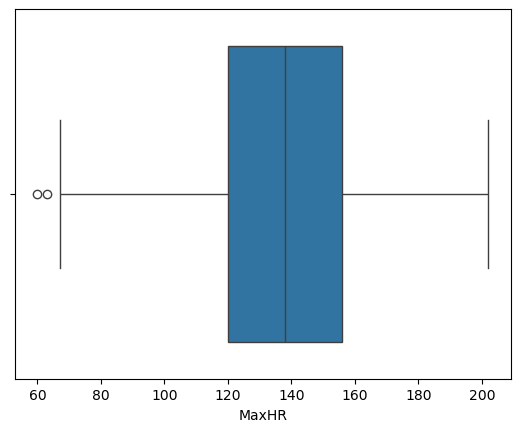

In [28]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['MaxHR']))

Axes(0.125,0.11;0.775x0.77)


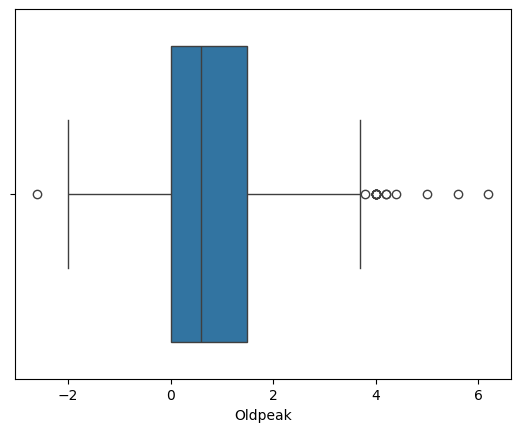

In [29]:
#boxlplot kolom RestingBP
print(sns.boxplot(x=df['Oldpeak']))

### Mengatasi Outliers

In [30]:
# #identifikasi outlier dan ubah ke null
# for i in ['RestingBP',
#                       'Cholesterol',
#                       'FastingBS',
#                       'MaxHR','Oldpeak',
#                      ]:
#   Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
#   IQR = Q3 - Q1
#   upper = Q3+(1.5*IQR)
#   lower = Q1-(1.5*IQR)
#   df.loc[df[i] < lower,i] = np.nan
#   df.loc[df[i] > upper,i] = np.nan

# df.isnull().sum()

In [31]:
# #imputasi outlier dengan median
# columnc=['RestingBP',
#                       'Cholesterol',
#                       'FastingBS',
#                       'MaxHR','Oldpeak',]
# for i in columnc:
#   df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

# print(df.isnull().sum())
# print(df.shape)

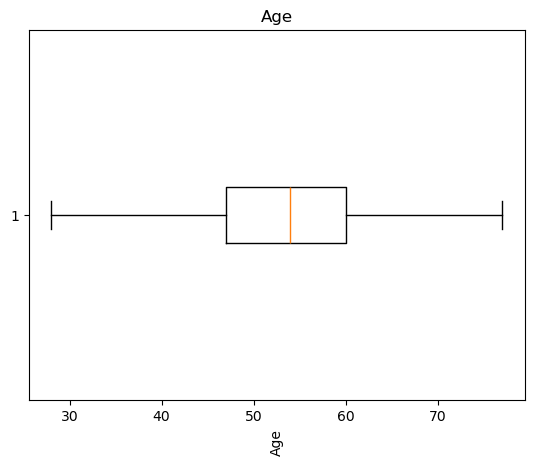

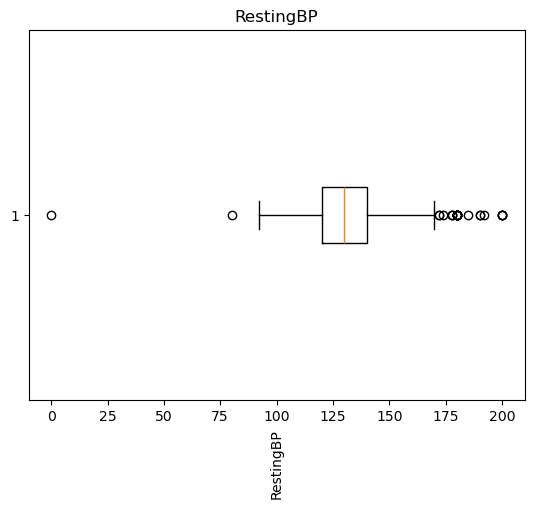

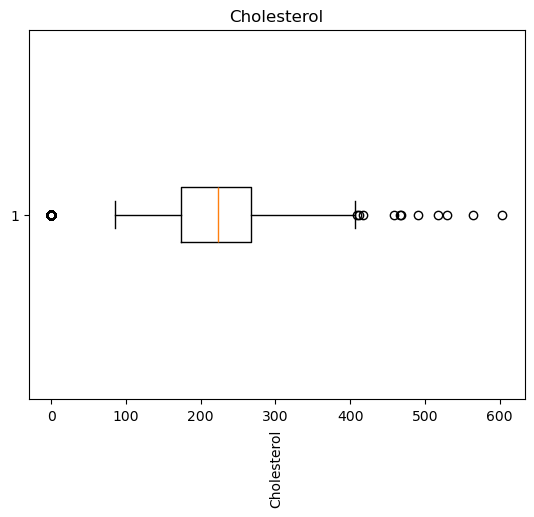

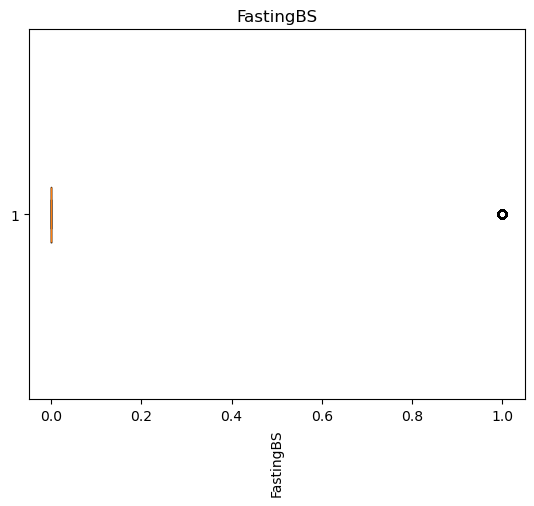

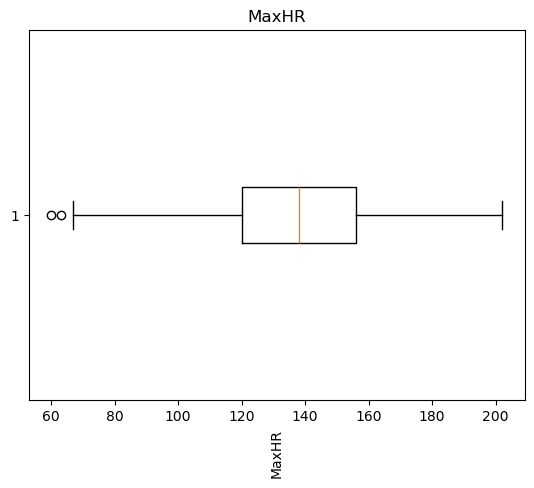

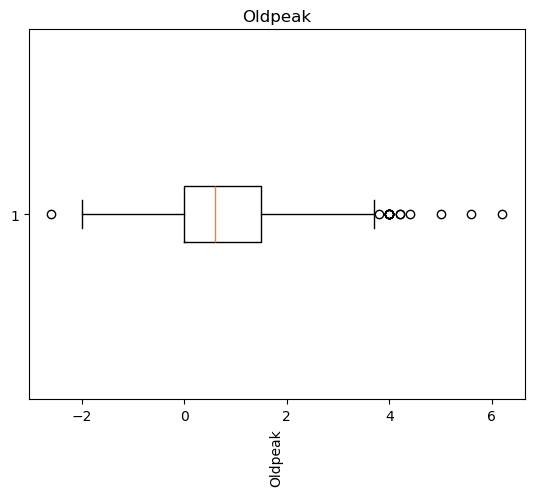

In [32]:
#membuat boxplot setelah menangani outlier

for cf in continuous_features:
    plt.boxplot(df[cf], vert=False)
    plt.title(cf)
    plt.xlabel(xlabel = cf,
               rotation=90)

    plt.show();

### EDA ( Univariate analysis )

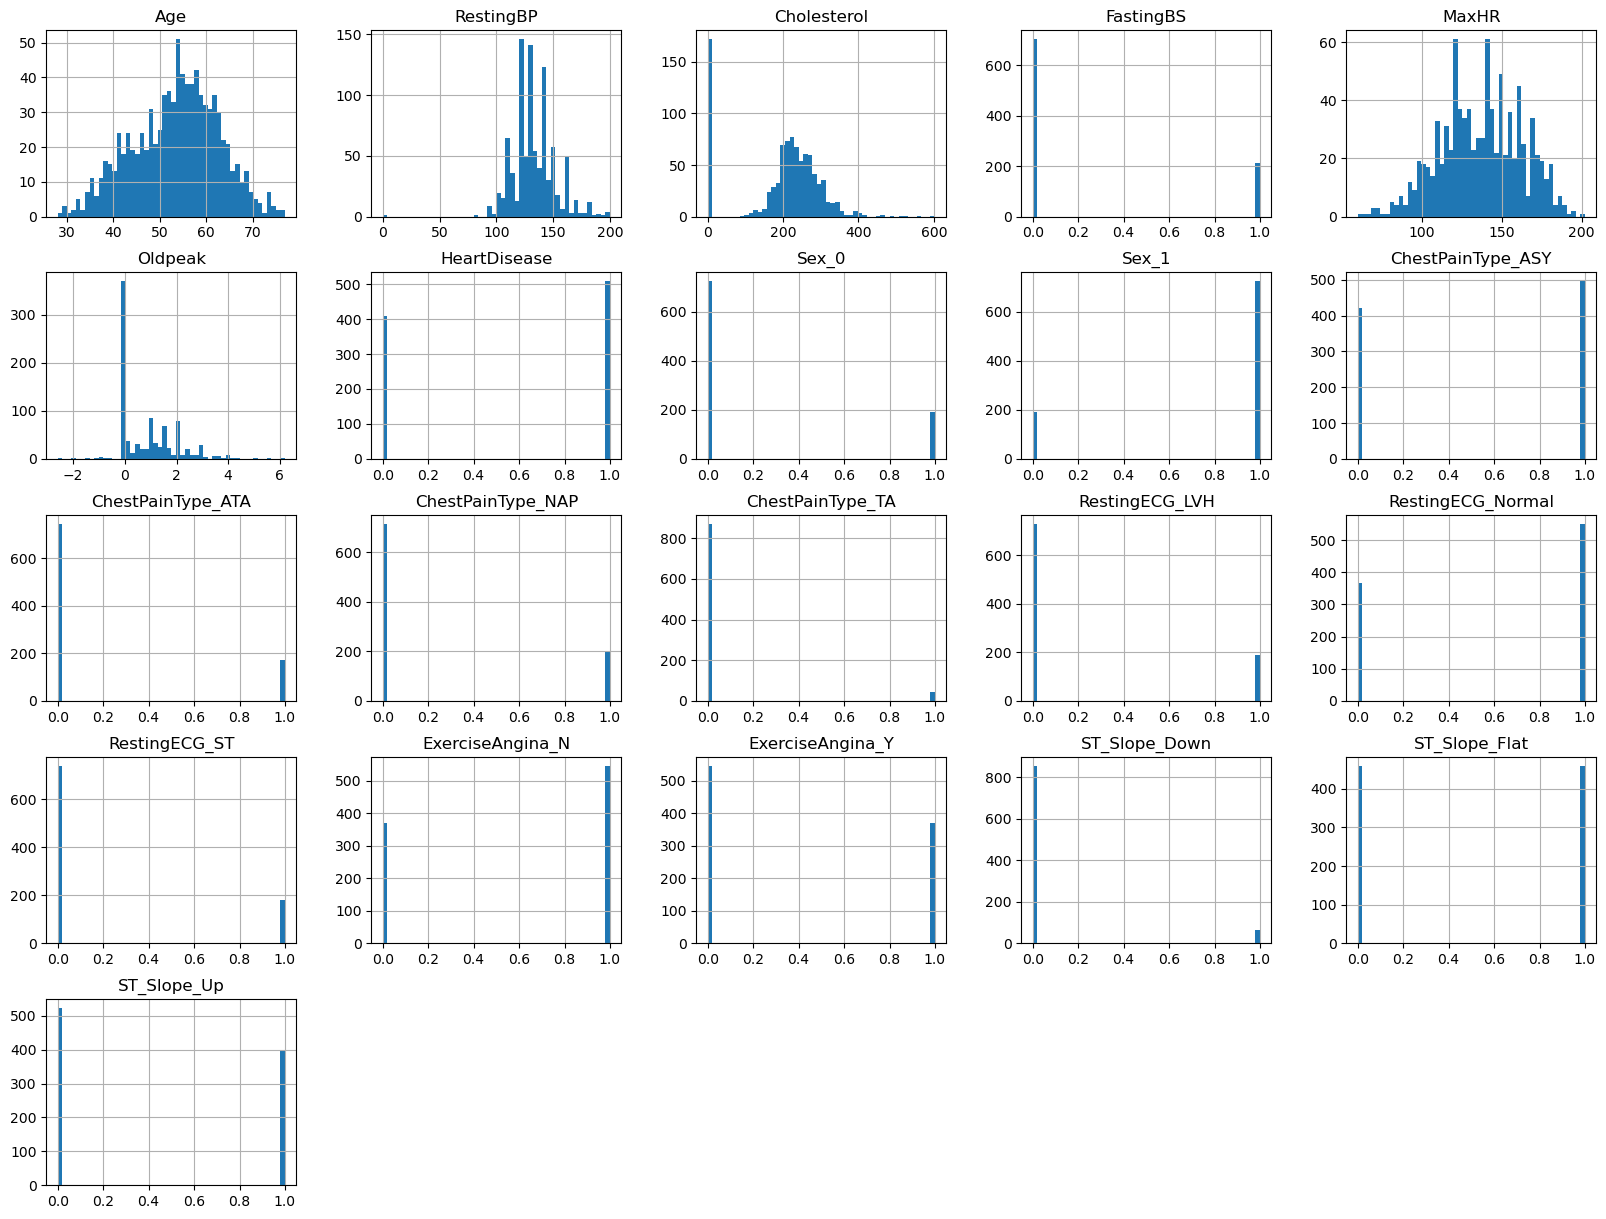

In [33]:
# univariate EDA
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

df.hist(bins=50, figsize=(20,15))
plt.show()

              jumlah sampel  persentase
HeartDisease                           
1                       508        55.3
0                       410        44.7


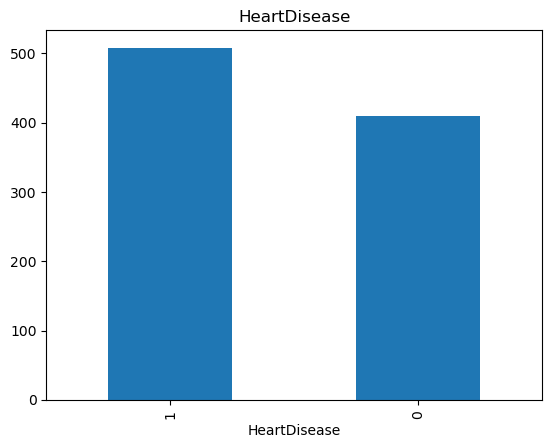

In [34]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=feature);

### EDA (Multivariate analysis)

#### Melihat korelasi antar variabel dengan heatmap

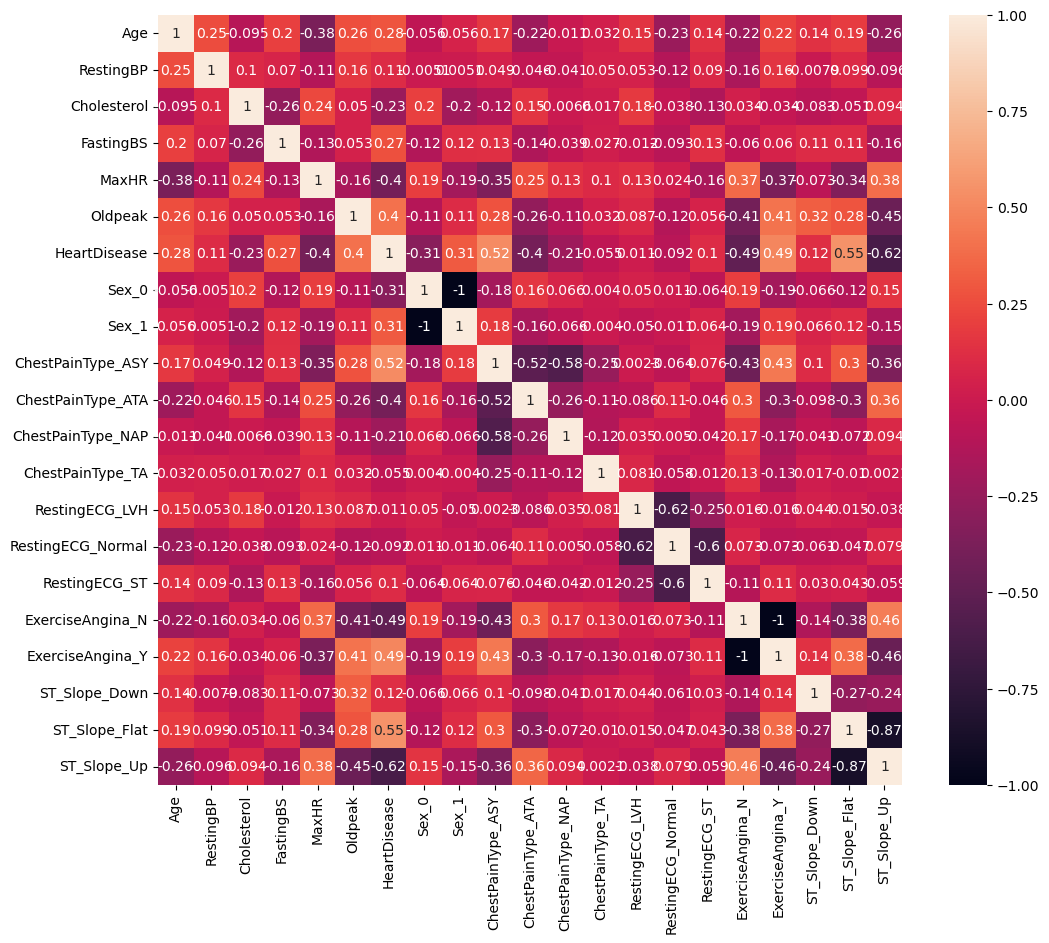

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), 
            annot=True);

### split data

In [36]:
#split data 80 20
from sklearn.model_selection import train_test_split

X = df.drop(["HeartDisease"],axis =1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


## Model Development

### Model Logistik Regression

In [38]:
#model Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model KNN

In [39]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

## Evaluasi Model

#### model LR

In [40]:
# Model logistik Regression
print(classification_report(y_test, y_pred))
print("akurasi LR :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        77
           1       0.82      0.91      0.86       107

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

akurasi LR : 0.8315217391304348


#### Model KNN

In [41]:
# Model  KNN
print(classification_report(y_test, y_pred2))
print("akurasi model knn:", knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        77
           1       0.68      0.71      0.70       107

    accuracy                           0.64       184
   macro avg       0.63      0.63      0.63       184
weighted avg       0.64      0.64      0.64       184

akurasi model knn: 0.6413043478260869


Diketahui menggunakan Model Logistik Regresi untuk memprediksi penyakit jantung memiliki tingkat akurasi 85.71% lebih tinggi dari model KNN yang memiliki tingkat akurasi 64.13%